# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. read dataset

In [2]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
x = df.drop('target',axis=1)
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25,stratify=y)
xtrain

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
231   57    1   0       165   289    1        0      124      0      1.0   
13    64    1   3       110   211    0        0      144      1      1.8   
28    65    0   2       140   417    1        0      157      0      0.8   
12    49    1   1       130   266    0        1      171      0      0.6   
235   51    1   0       140   299    0        1      173      1      1.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
44    39    1   2       140   321    0        0      182      0      0.0   
97    52    1   0       108   233    1        1      147      0      0.1   
282   59    1   2       126   218    1        1      134      0      2.2   
156   47    1   2       130   253    0        1      179      0      0.0   
100   42    1   3       148   244    0        0      178      0      0.8   

     slope  ca  thal  
231      1   3     3  
13       1   0     2  
28       2   1     2  
12       2   0     2  
235      2   0     3  
..     ...  ..   ...  
44       2   0     2  
97       2   3     3  
282      1   1     1  
156      2   0     2  
100      2   2     2  

[227 rows x 13 columns]

In [6]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Model evaluation

In [7]:
# Training data evaluation
ypredtrain = dt_model.predict(xtrain)

accuracy = accuracy_score(ytrain,ypredtrain)
print('accuracy :',accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix: \n',confusionmatrix)

classificationreport = classification_report(ytrain,ypredtrain)
print('classificationreport: \n',classificationreport)

accuracy : 1.0
confusion matrix: 
 [[103   0]
 [  0 124]]
classificationreport: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [8]:
# Testing data evaluation
ypredtest = dt_model.predict(xtest)

accuracy = accuracy_score(ytest,ypredtest)
print('accuracy :',accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix: \n',confusionmatrix)

classificationreport = classification_report(ytest,ypredtest)
print('classificationreport: \n',classificationreport)

accuracy : 0.7236842105263158
confusion matrix: 
 [[25 10]
 [11 30]]
classificationreport: 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        35
           1       0.75      0.73      0.74        41

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



# Plot decision tree

In [9]:
plt.figure(figsize = (200,150))
tree = plot_tree( dt_model, feature_names=x.columns,class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree1.png')

# 1.Hyperparameter tuning

In [10]:
dt_model = DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'], 'max_depth':np.arange(3,10),
       'min_samples_split':np.arange(2,20),'min_samples_leaf':np.arange(1,10)}

gscv_dt_model = GridSearchCV(dt_model,hyp,cv = 5)

gscv_dt_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [11]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [12]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,min_samples_split=10)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10)

# Model evaluation

In [13]:
# Training data evaluation
ypredtrain = dt_model.predict(xtrain)

accuracy = accuracy_score(ytrain,ypredtrain)
print('accuracy :',accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix: \n',confusionmatrix)

classificationreport = classification_report(ytrain,ypredtrain)
print('classificationreport: \n',classificationreport)

accuracy : 0.8942731277533039
confusion matrix: 
 [[ 88  15]
 [  9 115]]
classificationreport: 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       103
           1       0.88      0.93      0.91       124

    accuracy                           0.89       227
   macro avg       0.90      0.89      0.89       227
weighted avg       0.89      0.89      0.89       227



In [14]:
# Testing data evaluation
ypredtest = dt_model.predict(xtest)

accuracy = accuracy_score(ytest,ypredtest)
print('accuracy :',accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix: \n',confusionmatrix)

classificationreport = classification_report(ytest,ypredtest)
print('classificationreport: \n',classificationreport)

accuracy : 0.8552631578947368
confusion matrix: 
 [[29  6]
 [ 5 36]]
classificationreport: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



# Plot decision tree

In [15]:
plt.figure(figsize = (200,150))
tree = plot_tree( dt_model, feature_names=x.columns,class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree2.png')

In [16]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,min_samples_split=10)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10)

In [17]:
# Training data evaluation
ypredtrain = dt_model.predict(xtrain)

accuracy = accuracy_score(ytrain,ypredtrain)
print('accuracy :',accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix: \n',confusionmatrix)

classificationreport = classification_report(ytrain,ypredtrain)
print('classificationreport: \n',classificationreport)

accuracy : 0.8458149779735683
confusion matrix: 
 [[ 77  26]
 [  9 115]]
classificationreport: 
               precision    recall  f1-score   support

           0       0.90      0.75      0.81       103
           1       0.82      0.93      0.87       124

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.84       227
weighted avg       0.85      0.85      0.84       227



In [28]:
# Testing data evaluation
ypredtest = dt_model.predict(xtest)

accuracy = accuracy_score(ytest,ypredtest)
print('accuracy :',accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix: \n',confusionmatrix)

classificationreport = classification_report(ytest,ypredtest)
print('classificationreport: \n',classificationreport)

dt_model.score(xtest,ytest)

accuracy : 0.6973684210526315
confusion matrix: 
 [[24 11]
 [12 29]]
classificationreport: 
               precision    recall  f1-score   support

           0       0.67      0.69      0.68        35
           1       0.72      0.71      0.72        41

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



0.6973684210526315

# 2.Pruning

In [40]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [41]:
x = df.drop('target',axis=1)
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=25,stratify=y)
xtrain

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
231   57    1   0       165   289    1        0      124      0      1.0   
13    64    1   3       110   211    0        0      144      1      1.8   
28    65    0   2       140   417    1        0      157      0      0.8   
12    49    1   1       130   266    0        1      171      0      0.6   
235   51    1   0       140   299    0        1      173      1      1.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
44    39    1   2       140   321    0        0      182      0      0.0   
97    52    1   0       108   233    1        1      147      0      0.1   
282   59    1   2       126   218    1        1      134      0      2.2   
156   47    1   2       130   253    0        1      179      0      0.0   
100   42    1   3       148   244    0        0      178      0      0.8   

     slope  ca  thal  
231      1   3     3  
13       1   0     2  
28       2   1     2  
12       2   0     2  
235      2   0     3  
..     ...  ..   ...  
44       2   0     2  
97       2   3     3  
282      1   1     1  
156      2   0     2  
100      2   2     2  

[227 rows x 13 columns]

In [43]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [44]:
result = dt_model.cost_complexity_pruning_path(xtrain,ytrain)
result

{'ccp_alphas': array([0.        , 0.00288622, 0.0041116 , 0.00432371, 0.00550661,
        0.00587372, 0.00660793, 0.00660793, 0.00660793, 0.00755192,
        0.00770925, 0.00783162, 0.00800961, 0.00836515, 0.00917768,
        0.01051945, 0.01122681, 0.01176968, 0.01182724, 0.01310082,
        0.01371282, 0.02155503, 0.02595617, 0.04216739, 0.14801558]),
 'impurities': array([0.        , 0.00865867, 0.01688187, 0.02552928, 0.04755571,
        0.05342943, 0.06003736, 0.06664529, 0.07325322, 0.08080514,
        0.09622364, 0.11188688, 0.11989649, 0.12826164, 0.146617  ,
        0.15713645, 0.16836325, 0.18013293, 0.20378741, 0.21688823,
        0.25802668, 0.27958171, 0.30553788, 0.34770528, 0.49572086])}

In [46]:
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00288622, 0.0041116 , 0.00432371, 0.00550661,
       0.00587372, 0.00660793, 0.00660793, 0.00660793, 0.00755192,
       0.00770925, 0.00783162, 0.00800961, 0.00836515, 0.00917768,
       0.01051945, 0.01122681, 0.01176968, 0.01182724, 0.01310082,
       0.01371282, 0.02155503, 0.02595617, 0.04216739, 0.14801558])

In [47]:
train_data_accuracy = [] # null list
test_data_accuracy = []

for ccp_alpha in ccp_alpha_list:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dt_model.fit(xtrain,ytrain)
    train_accuracy = dt_model.score(xtrain,ytrain)
    train_data_accuracy.append(train_accuracy)
    test_accuracy = dt_model.score(xtest,ytest)
    test_data_accuracy.append(test_accuracy)
    
    print('ccp_alpha    :',ccp_alpha)
    print('trainaccuracy: ',train_accuracy)
    print('testaccuracy: ',test_accuracy)
    print('*'*80)

ccp_alpha    : 0.0
trainaccuracy:  1.0
testaccuracy:  0.7105263157894737
********************************************************************************
ccp_alpha    : 0.0028862220871942925
trainaccuracy:  0.9955947136563876
testaccuracy:  0.7236842105263158
********************************************************************************
ccp_alpha    : 0.004111600587371513
trainaccuracy:  0.9911894273127754
testaccuracy:  0.7368421052631579
********************************************************************************
ccp_alpha    : 0.004323706966878769
trainaccuracy:  0.986784140969163
testaccuracy:  0.7236842105263158
********************************************************************************
ccp_alpha    : 0.005506607929515419
trainaccuracy:  0.973568281938326
testaccuracy:  0.7368421052631579
********************************************************************************
ccp_alpha    : 0.005873715124816446
trainaccuracy:  0.9691629955947136
testaccuracy:  0.736842105263157

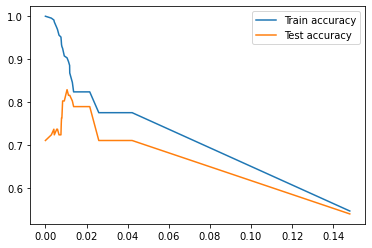

In [48]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_data_accuracy,label='Train accuracy')
ax.plot(ccp_alpha_list,test_data_accuracy,label='Test accuracy')
ax.legend()

In [50]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.014)
dt_model.fit(xtrain,ytrain)
train_accuracy = dt_model.score(xtrain,ytrain)
print('training accuracy',train_accuracy)
test_accuracy = dt_model.score(xtest,ytest)
print('testing accuracy',test_accuracy)

training accuracy 0.8237885462555066
testing accuracy 0.7894736842105263


In [51]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.02)
dt_model.fit(xtrain,ytrain)
train_accuracy = dt_model.score(xtrain,ytrain)
print('training accuracy',train_accuracy)
test_accuracy = dt_model.score(xtest,ytest)
print('testing accuracy',test_accuracy)

training accuracy 0.8237885462555066
testing accuracy 0.7894736842105263


In [52]:
plt.figure(figsize = (200,150))
tree = plot_tree( dt_model, feature_names=x.columns,class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree3.png')